# Monitoring Global warming Linear Regression

![image](images/Global-warming.jpg)


## import libraries

In [1]:
import pandas as pd    # Used for csv file import and manipulation

import numpy as np     # Used for creating lists, array manipulation

import seaborn as sns  # Used for visualisations

import matplotlib.pyplot as plt    # Used for visualisations

#for static figures in this notebook
%matplotlib inline  

## Load the Datasets and cleaning

* We will use Global CO2 Emissions from Fossil Fuels dataset from the below link.

[Link to global co2 dataset](http://data.okfn.org/data/core/co2-fossil-global) 

* Also for temperature we will use below dataset. 

[Link to temperature datasets](http://data.okfn.org/data/core/global-temp)

In [2]:
# co2 dataset

co2_df = pd.read_csv('global_co2.csv')     # Reading the csv file from pandas read_csv function.
co2_df.tail()                              # Show the last 5 rows of a csv file.

Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
255  2006   8370      1525         3089        3339     356           61   
256  2007   8566      1572         3081        3464     382           68   
257  2008   8783      1631         3122        3571     388           71   
258  2009   8740      1585         3056        3620     413           66   
259  2010   9167      1702         3114        3842     450           59   

     Per Capita  
255        1.27  
256        1.28  
257        1.30  
258        1.28  
259        1.33

* **In Python all index start from 0 rather 1**

In [3]:
# Cleaning the co2 datasts

co2_df = co2_df[co2_df.Year > 1960]      # Keep data which is greater than 1960 

co2_df = co2_df.iloc[:,:2]               # Keep only "Year" & "Total" column  

co2_df.columns = ['Year','CO2']          # renaming the column names

co2_df = co2_df.reset_index(drop=True)   # reset index to 0 

co2_df.tail()

Year   CO2
45  2006  8370
46  2007  8566
47  2008  8783
48  2009  8740
49  2010  9167

In [4]:
# temperature dataset

temp_df = pd.read_csv('annual_temp.csv') # Load the global tempeerature dataset 
temp_df.head()                           # showing the first 5 rows from the csv file

# We are getting the relative temperature increases or decrease in a year

Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687

In [5]:
# Cleaning temperature data

temp_df = temp_df[temp_df.Source != 'GISTEMP']          # Keeping only one source 'GCAG' which is we need

tempdf = temp_df.drop('Source',axis = 1,inplace=True)   # delete Source column 

temp_df = temp_df[(temp_df.Year > 1960) & (temp_df.Year < 2011)]                  # Keep data in 1960-2010 

temp_df = temp_df.reindex(index=temp_df.index[::-1])    # invert the columns to sort in increasing order

temp_df.columns = ['Year','Temperature_change']                # rename column names  

temp_df = temp_df.reset_index(drop=True)                # reset index to 0

temp_df.tail()

Year  Temperature_change
45  2006              0.6139
46  2007              0.6113
47  2008              0.5415
48  2009              0.6354
49  2010              0.7008

### concatenating  the datasets

In [6]:
df = pd.concat([co2_df,temp_df.Temperature_change], axis=1)   # concatinate two datasets to one dataset
df.head()

Year   CO2  Temperature_change
0  1961  2580              0.0818
1  1962  2686              0.0924
2  1963  2833              0.1100
3  1964  2995             -0.1461
4  1965  3130             -0.0752

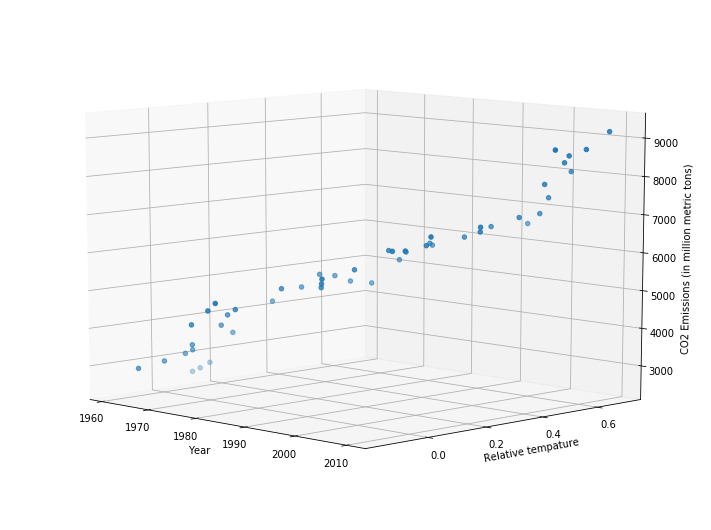

In [7]:
from mpl_toolkits.mplot3d import Axes3D             # matplotlib library for 3d plot 
fig = plt.figure()                                  
fig.set_size_inches(12.5, 9.5)                      # setting figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs= df['Year'],ys=df['Temperature_change'],zs = df['CO2']) # scatter plot
ax.set_ylabel('Relative tempature');
ax.set_xlabel('Year');
ax.set_zlabel('CO2 Emissions (in million metric tons)')
ax.view_init(10, -45)     # for setting the appropiate view 

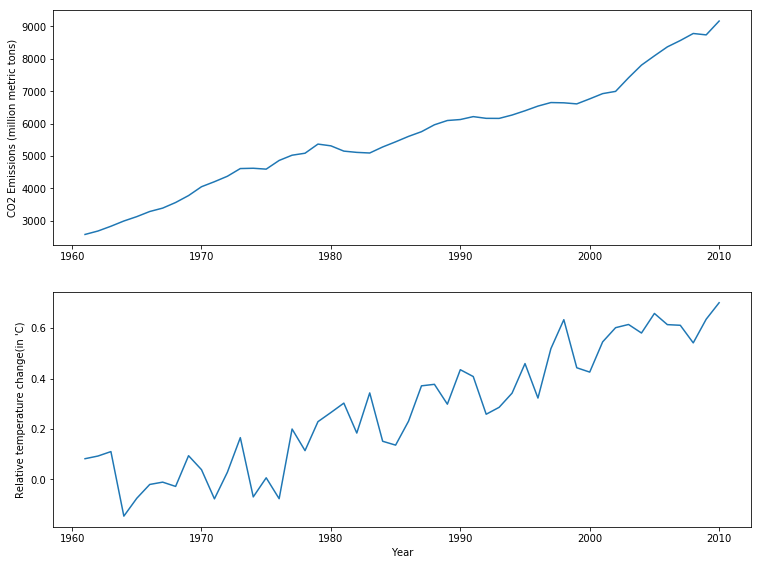

In [8]:
# 2d plots
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.plot(df['Year'],df['CO2'])
plt.ylabel('CO2 Emissions (million metric tons)')

plt.subplot(2, 1, 2)
plt.plot(df['Year'],df['Temperature_change'])
plt.xlabel('Year')
plt.ylabel("Relative temperature change(in 'C)")

plt.show()

## Linear regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
#X = df.as_matrix(['Year'])                                          
#y = df.as_matrix(['CO2','Temperature']).astype('float32')            

X = df['Year'].values.reshape(-1, 1)                   # Year as feature 
y = df[['CO2','Temperature_change']].values           # two labels  to predict

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.1)   # split the dataset with 10% test data 


In [11]:
reg = LinearRegression()                  # start the clasifier
reg.fit(X_train,y_train)                  # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
reg.coef_      # line coefficient in the form of y = mx + c

array([[1.13463283e+02],
       [1.52402055e-02]])

In [13]:
print('Score :' ,reg.score(X_test.reshape(-1,1),y_test))    # error score on test data

Score : 0.9768588237138923


In [14]:
x_line = np.arange(1960,2050).reshape(-1,1)                 # lining Year 1960 to 2050
p = reg.predict(x_line).T                                   # predict the labels 

## 3d Plots

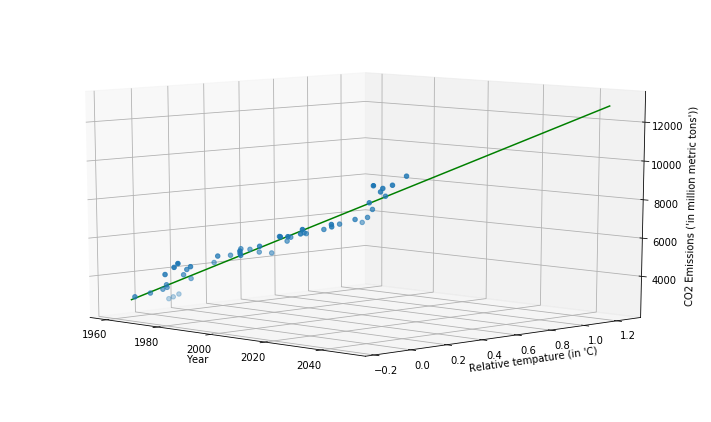

In [15]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=df['Year'], ys=df['Temperature_change'], zs=df['CO2'])
ax.set_ylabel("Relative tempature (in 'C)"); ax.set_xlabel('Year'); ax.set_zlabel("CO2 Emissions ('in million metric tons'))")
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')        # predicted line 
ax.view_init(10, -45)

## projected 2d plot

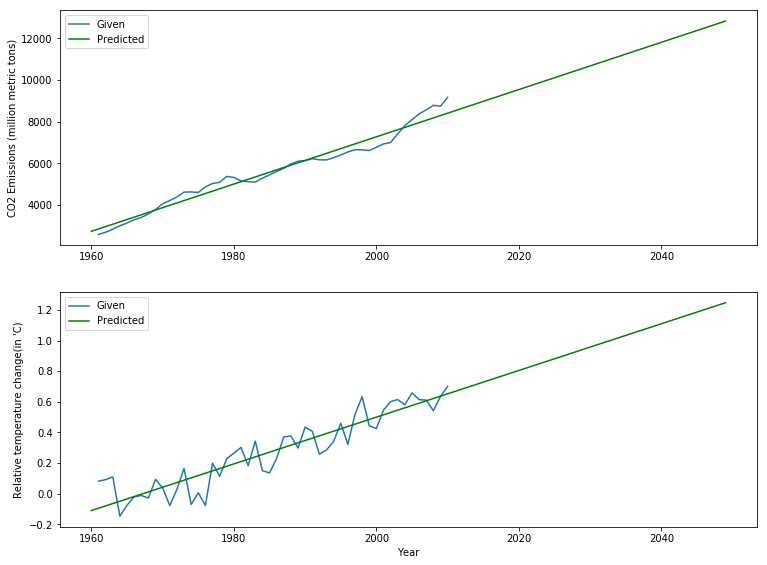

In [16]:
# 2d plots
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.plot(df['Year'],df['CO2'],label='Given')
plt.plot(x_line,p[0], color='green',label='Predicted')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(df['Year'],df['Temperature_change'],label='Given')
plt.plot(x_line,p[1], color='green',label='Predicted')
plt.xlabel('Year')
plt.ylabel("Relative temperature change(in 'C)")
plt.legend()

plt.show()

# Don’t make our earth garbage; save it from global warming.